In [16]:
import matplotlib.pyplot as plt
import numpy as np

release_dir = "./cmake-build-release/"
padding_dir = "./cmake-build-padding/"
out_dir = "results/"

sequential_name = "sequential"
parallel_AOS = "parallel_AOS"
parallel_AOS_simd = "parallel_AOS_simd"
parallel_AOS_simd_manual = "parallel_AOS_simd_manual"
parallel_SOA = "parallel_SOA"
parallel_SOA_simd = "parallel_SOA_simd"
parallel_SOA_simd_manual = "parallel_SOA_simd_manual"

iterations = 6

In [17]:
def scrape_data(dir_path):
    series = np.empty(0)
    for i in range(1, iterations):
        file = open(dir_path + f"/{i}.txt")
        data = file.read().split(",")
        data.pop(-1)
        series = np.concat((series, data))
        file.close()
    return series.astype(float)

def print_stats(array):
    print(f"Mean:{np.mean(array)}")
    print(f"Max:{np.max(array)}")
    print(f"Min:{np.min(array)}")
    print(f"Std:{np.std(array)}")

## SpeedUp for Increasing Threads

In [18]:
sequential_serie = np.empty(0, dtype = float)
parallel_AOS_series = []
parallel_AOS_simd_series = []
parallel_AOS_simd_manual_series = []
parallel_SOA_series = []
parallel_SOA_simd_series = []
parallel_SOA_simd_manual_series = []

parallel_AOS_series_p = []
parallel_AOS_simd_series_p = []
parallel_AOS_simd_manual_series_p = []

sequential_series = scrape_data(out_dir + sequential_name)
sequential_series_p = (scrape_data(out_dir + sequential_name + "_padding"))

In [19]:
print_stats(sequential_series)

Mean:0.06384309128630705
Max:0.073142
Min:0.05748
Std:0.0045515914350854735


In [20]:
threads = range(1,11)
for t in threads:
    parallel_AOS_series.append(scrape_data(out_dir + parallel_AOS + f"_{t}"))
    parallel_AOS_simd_series.append(scrape_data(out_dir + parallel_AOS_simd + f"_{t}"))
    parallel_AOS_simd_manual_series.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_{t}"))
    parallel_SOA_series.append(scrape_data(out_dir + parallel_SOA + f"_{t}"))
    parallel_SOA_simd_series.append(scrape_data(out_dir + parallel_SOA_simd + f"_{t}"))
    parallel_SOA_simd_manual_series.append(scrape_data(out_dir + parallel_SOA_simd_manual + f"_{t}"))

    parallel_AOS_series_p.append(scrape_data(out_dir + parallel_AOS + f"_padding_{t}"))
    parallel_AOS_simd_series_p.append(scrape_data(out_dir + parallel_AOS_simd + f"_padding_{t}"))
    parallel_AOS_simd_manual_series_p.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_padding_{t}"))

In [21]:
print_stats(parallel_AOS_series[7])

Mean:0.015027792289988491
Max:0.032445
Min:0.013952
Std:0.0013617843942740392


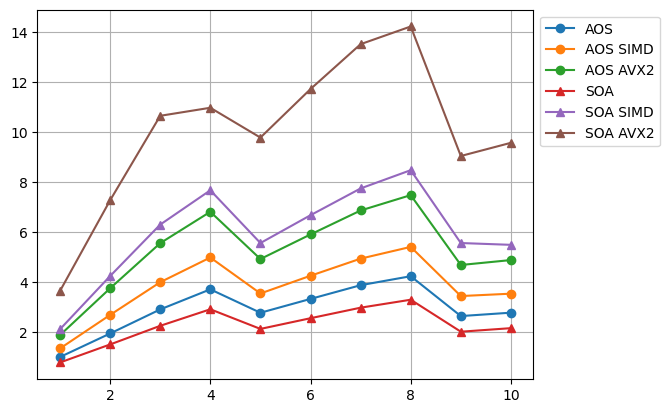

In [22]:
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_series[i]) for i in range(len(threads))], label = "AOS", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(threads))], label = "AOS SIMD", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(threads))], label = "AOS AVX2", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_SOA_series[i]) for i in range(len(threads))], label = "SOA", marker = "^")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_SOA_simd_series[i]) for i in range(len(threads))], label = "SOA SIMD", marker = "^")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_SOA_simd_manual_series[i]) for i in range(len(threads))], label = "SOA AVX2", marker = "^")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

## Confronting Padding

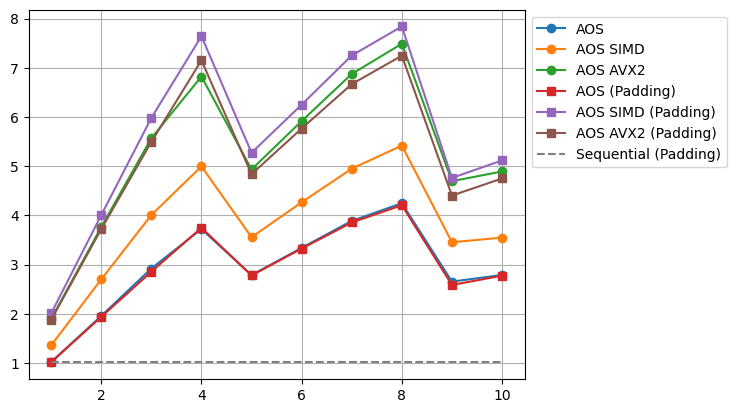

In [25]:
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_series[i]) for i in range(len(threads))], label = "AOS", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(threads))], label = "AOS SIMD", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(threads))], label = "AOS AVX2", marker = "o")

plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_series_p[i]) for i in range(len(threads))], label = "AOS (Padding)", marker = "s")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series_p[i]) for i in range(len(threads))], label = "AOS SIMD (Padding)", marker = "s")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series_p[i]) for i in range(len(threads))], label = "AOS AVX2 (Padding)", marker = "s")

plt.hlines(np.mean(sequential_series) / np.mean(sequential_series_p), min(threads), max(threads), color = "grey", ls = "--", label = "Sequential (Padding)")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

## SpeedUp for increasing Load

In [9]:
sequential_series = []
parallel_AOS_series = []
parallel_AOS_simd_series = []
parallel_AOS_simd_manual_series = []
parallel_SOA_series = []
parallel_SOA_simd_series = []
parallel_SOA_simd_manual_series = []


In [10]:
loads = range(1000,15001,1000)
for l in loads:
    sequential_series.append(scrape_data(out_dir + sequential_name + f"_load{l}"))
    parallel_AOS_series.append(scrape_data(out_dir + parallel_AOS + f"_load{l}"))
    parallel_AOS_simd_series.append(scrape_data(out_dir + parallel_AOS_simd + f"_load{l}"))
    parallel_AOS_simd_manual_series.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_load{l}"))
    parallel_SOA_series.append(scrape_data(out_dir + parallel_SOA + f"_load{l}"))
    parallel_SOA_simd_series.append(scrape_data(out_dir + parallel_SOA_simd + f"_load{l}"))
    parallel_SOA_simd_manual_series.append(scrape_data(out_dir + parallel_SOA_simd_manual + f"_load{l}"))

In [11]:
print_stats(sequential_series[7])
print_stats(parallel_AOS_series[7])

Mean:0.15139359365079363
Max:0.162307
Min:0.146945
Std:0.003411041892678904
Mean:0.03710284014002334
Max:0.069294
Min:0.035633
Std:0.0022456667000626657


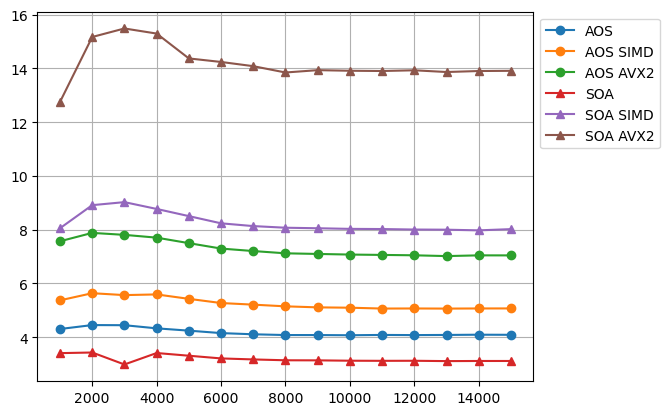

In [12]:
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_series[i]) for i in range(len(loads))], label = "AOS", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(loads))], label = "AOS SIMD", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(loads))], label = "AOS AVX2", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_SOA_series[i]) for i in range(len(loads))], label = "SOA", marker = "^")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_SOA_simd_series[i]) for i in range(len(loads))], label = "SOA SIMD", marker = "^")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_SOA_simd_manual_series[i]) for i in range(len(loads))], label = "SOA AVX2", marker = "^")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()